|Балл|Сделано|Критерий|
|----|-------|--------|
|1|да|Программа запускается и оформлена по PEP8. Соответствие PEP8 можно проверить с помощью команды `pycodestyle my_script_name.py` в командной строке.|
|2|да|Строится граф для какого либо семантического поля. Находятся соседи первого и второго порядка для изначально заданного узла (узлов).|
|1|да|В граф добавляются только узлы, имеющие косинусную близость **≥0.5** к любому из уже имеющихся|
|1|да|Реализована фильтрация по частям речи: узлами являются только существительные, только глаголы и т.п.|
|1|да|Рассчитана центральность узлов графа по метрикам, указанным в п.4.|
|1|да|Рассчитано значение метрик, указанных в п.5.|
|1|да|Граф разбит на сообщества, есть краткая интерпретация.|
|1|да|Граф визуализирован|
|1|да|Внешний вид графа задан в соответствии с п.7|
|5|нет|**Бонусный балл.** Задание оформлено в виде веб-приложения, где пользователь может ввести любое слово в качестве начального узла и получить картинку с соответствующим графом и все статистики по нему (те, что указаны в задании + количество узлов и ребер).|
|**10**|**итого**|должно быть|

In [2]:
import gensim
import networkx as nx
from gensim.models import word2vec
from networkx.algorithms import community
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [3]:
%load_ext pycodestyle_magic

In [4]:
# %%flake8
m = 'ruscorpora_mystem_cbow_300_2_2015.bin.gz'
model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=True)

In [6]:
# %%flake8
words = ['плыть_V',
         'барахтаться_V',
         'купаться_V',
         'тонуть_V']

all_words = []
new_words = []
for word in words:
    if word in model:
        word0 = word.replace('_V', '')
        all_words.append(word0)
        new_words.append(word)
        for w1 in model.most_similar(positive=[word], topn=10):
            if w1[1] >= 0.5 and w1[0].endswith('_V'):
                word1 = w1[0].replace('_V', '')
                if word1 not in all_words:
                    all_words.append(word1)
                    new_words.append(w1[0])
                for w2 in model.most_similar(positive=[w1[0]], topn=10):
                    if w2[1] >= 0.5 and w2[0].endswith('_V'):
                        word2 = w2[0].replace('_V', '')
                        if word2 not in all_words:
                            all_words.append(word2)
                            new_words.append(w2[0])
print(all_words[:5])
print(new_words[:5])

['плыть', 'поплыть', 'уплывать', 'понестись', 'побежать']
['плыть_V', 'поплыть_V', 'уплывать_V', 'понестись_V', 'побежать_V']


In [7]:
print(len(all_words))

81


In [8]:
G = nx.Graph()

In [9]:
# %%flake8
new_edges = []
for word1 in new_words:
    for word2 in new_words:
        s = model.similarity(word1, word2)
        if 1 > s > 0.5:
            new_edges.append((word1.replace('_V', ''),
                              word2.replace('_V', '')))

In [10]:
G.add_nodes_from([i for i in all_words])
G.add_edges_from(new_edges)

In [11]:
print('узлы', G.nodes())

узлы ['плыть', 'поплыть', 'уплывать', 'понестись', 'побежать', 'устремляться', 'отплывать', 'двинуться', 'нестись', 'нырнуть', 'полететь', 'уходить', 'уноситься', 'улетать', 'уносить', 'приплывать', 'проплывать', 'проноситься', 'пролетать', 'пробегать', 'промчаться', 'проходить', 'проползать', 'пролететь', 'пронестись', 'проскочить', 'плавать', 'нырять', 'плескаться', 'тонуть', 'летать', 'купаться', 'лететь', 'вылетать', 'мчаться', 'взлетать', 'колыхаться', 'качаться', 'покачиваться', 'зыбиться', 'вздыматься', 'струиться', 'заколыхаться', 'зыбить', 'раскачиваться', 'колыхать', 'двигаться', 'передвигаться', 'перемещаться', 'продвигаться', 'ползти', 'шагать', 'подвигаться', 'двигать', 'скользить', 'отчаливать', 'причаливать', 'подплывать', 'доплывать', 'помчаться', 'мчать', 'утопать', 'потопать', 'барахтаться', 'плескать', 'журчать', 'поплескивать', 'бурлить', 'пениться', 'рябиться', 'шуметь', 'пенить', 'всплескиваться', 'выкупаться', 'искупаться', 'поплавать', 'понырять', 'утапливать']


## Кластеризация

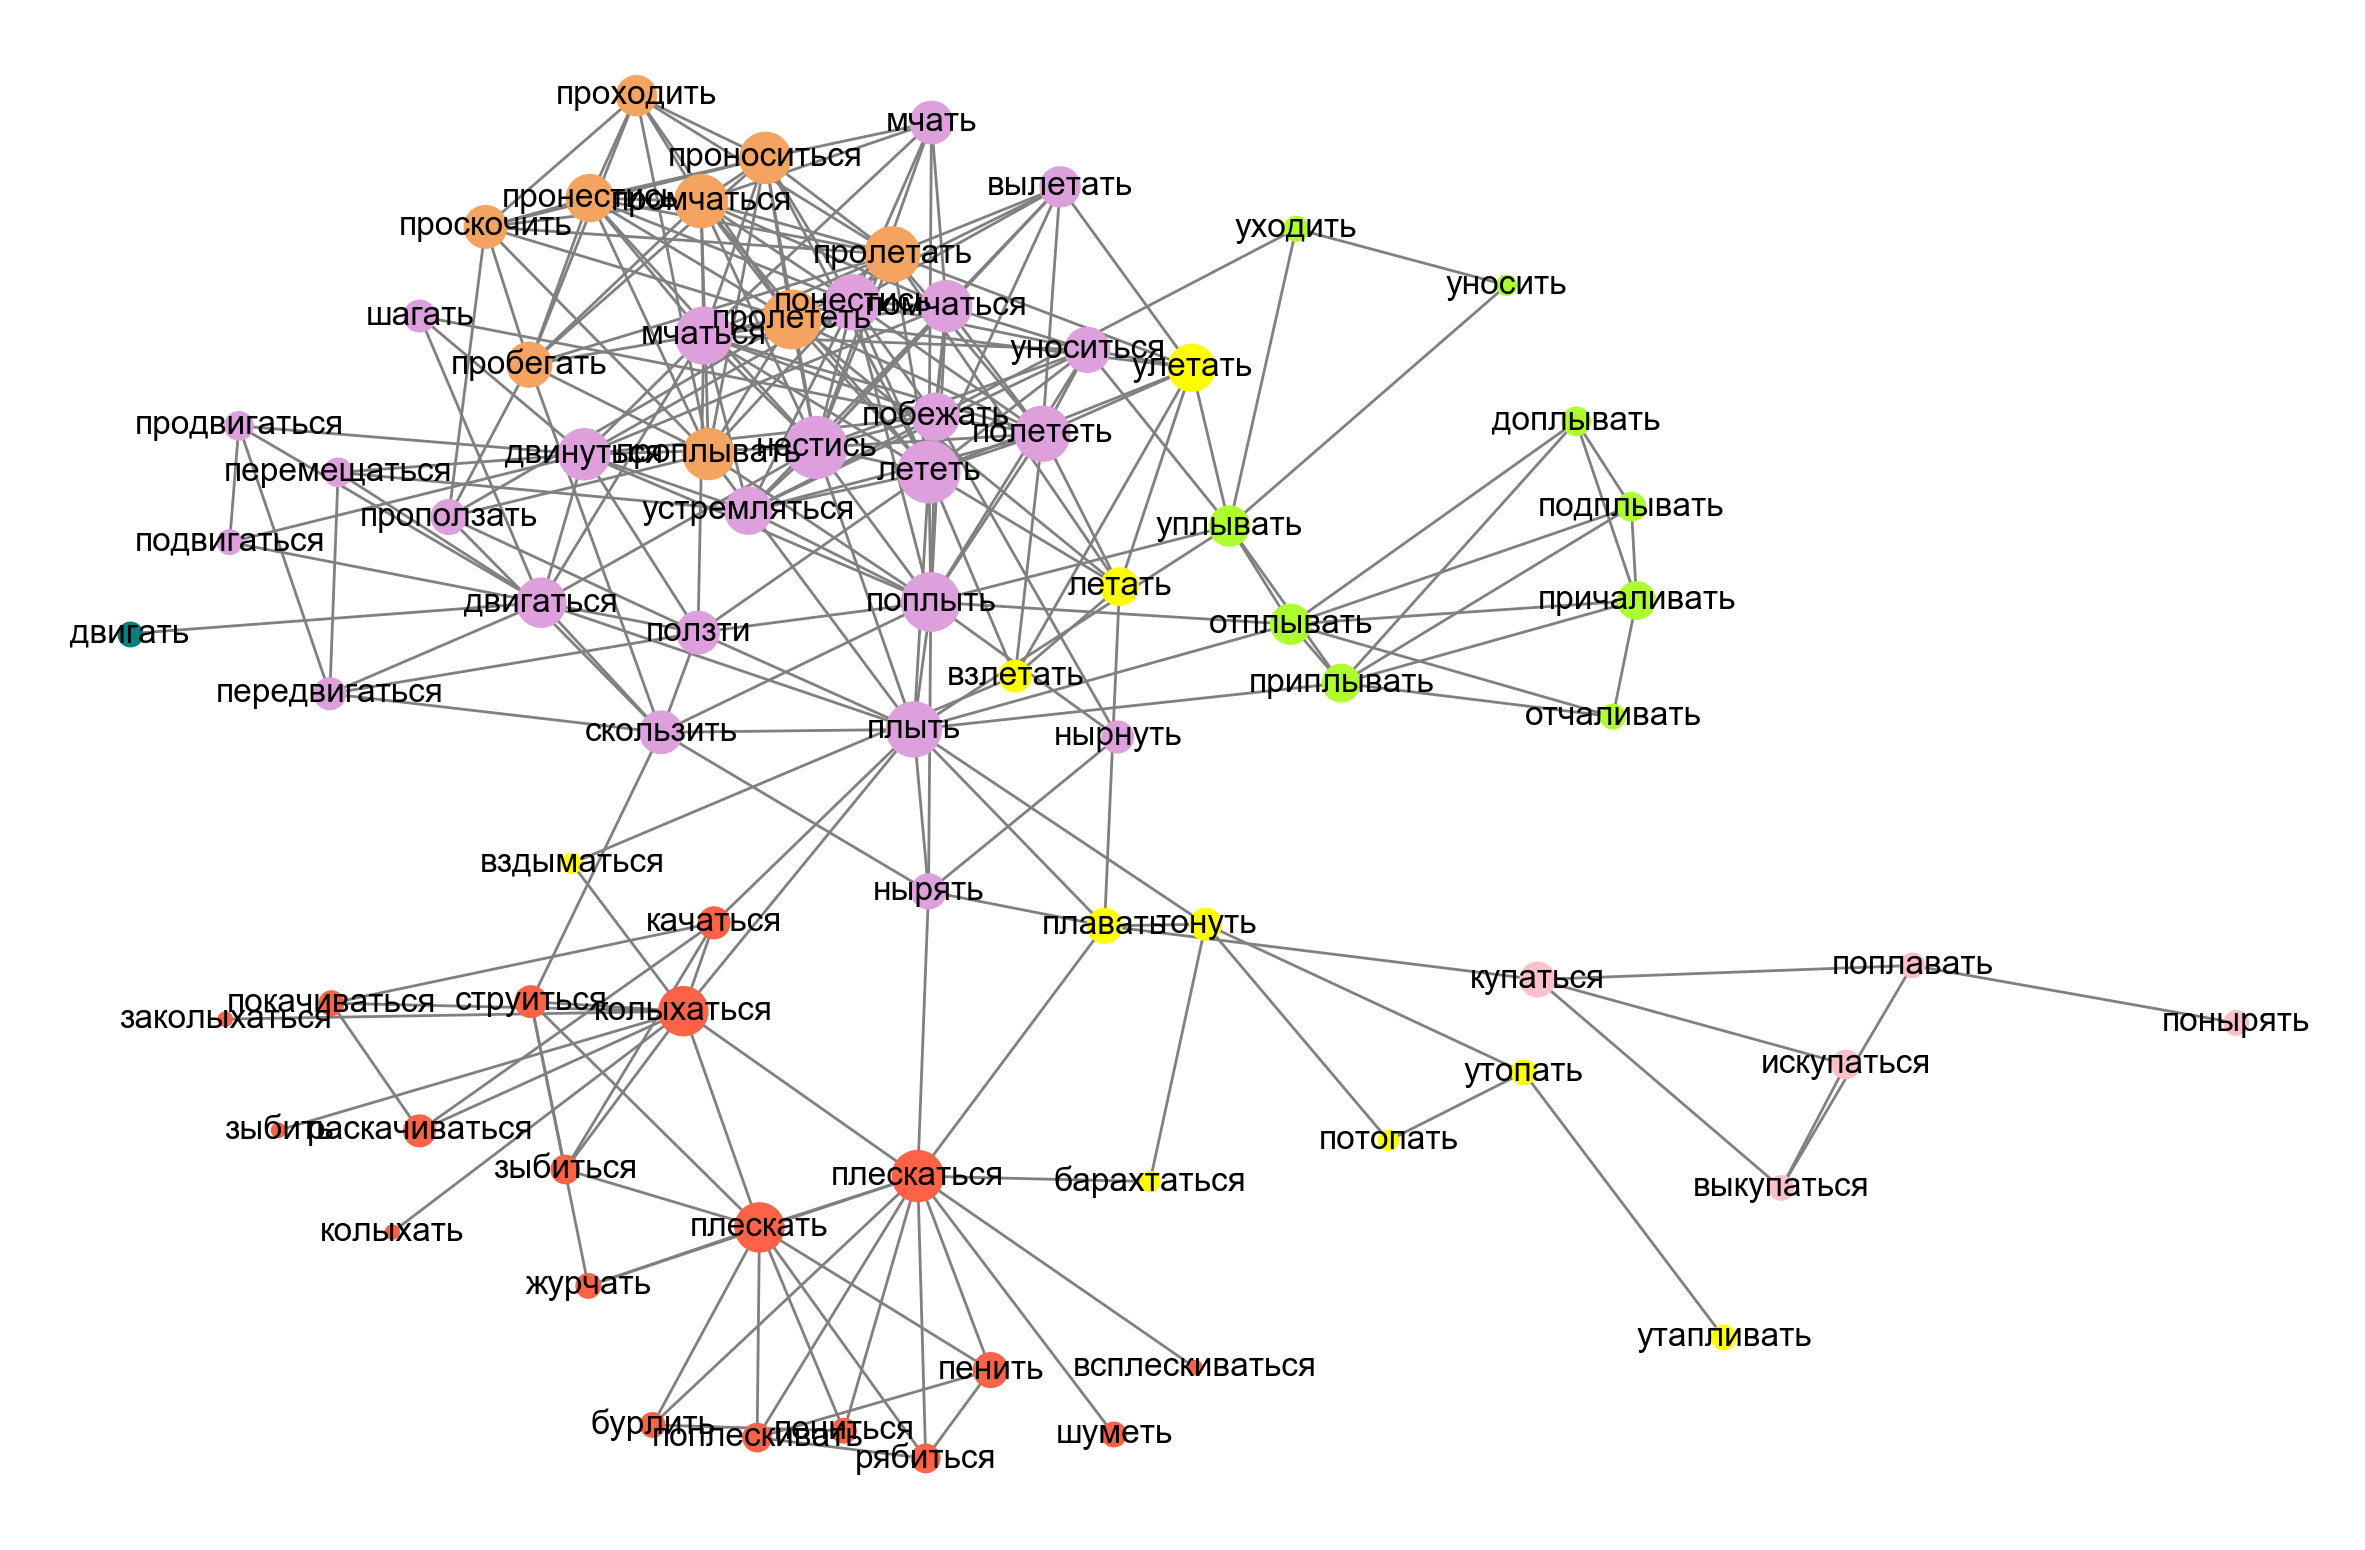

In [12]:
# %%flake8
pos = nx.kamada_kawai_layout(G)

plt.figure(figsize=(15, 10), dpi=200)

coms = community.greedy_modularity_communities(G)
dc = nx.degree_centrality(G)
colors = ['plum', 'tomato', 'yellow', 'sandybrown',
          'greenyellow', 'pink', 'teal', 'cyan', 'black']
n = 0
for i in coms:
    if n == len(colors):
        print('мало цветов')
        break
    com = list(i)
    sizes = []
    for verb in com:
        sizes.append(dc[verb]*2000)
    nx.draw_networkx_nodes(com, pos, node_color=colors[n], node_size=sizes)
    n += 1

nx.draw_networkx_edges(G, pos, edge_color='grey')
nx.draw_networkx_labels(G, pos, font_size=12, font_family='Arial')

plt.axis('off')

plt.show()

**Размер** - degree centrality

**Цвет** - кластеры

Интерпритация:

* кластер персиковый - глаголы движения с приставкой *про* = "движение мимо чего-то"
* кластер сиреневый - бызовые глаголы движения любым способом
* кластер желтый - не совсем однородный, сложно сказать
* кластер салатовый - глаголы с приставками *у, от* и *до, при, под* = "направленное действие: достижение цели или удаление от начальной точик"
* кластер красный - глаголы действия объектов в воде, для одуш и не одуш объектов.
* кластер розовый - глаголы действия людей в воде = "купание"
* кластер бирюзовый - глагол *двигать*

## Самые центральные узлы

Вычислите самые центральные узлы графа по degree centrality, betweenness centrality, closeness centrality и eigencentrality.

In [13]:
# %%flake8
degr_centr = nx.degree_centrality(G)
maxdc = max(degr_centr.values())
for key, value in degr_centr.items():
    if value == maxdc:
        print(key)

нестись
лететь


In [14]:
betw_centr = nx.betweenness_centrality(G)
maxbc = max(betw_centr.values())
for key, value in betw_centr.items():
    if value == maxbc:
        print(key)

плыть


In [15]:
close_centr = nx.closeness_centrality(G)
maxcc = max(close_centr.values())
for key, value in close_centr.items():
    if value == maxcc:
        print(key)

плыть


In [16]:
eigen_centr = nx.eigenvector_centrality(G)
maxec = max(eigen_centr.values())
for key, value in eigen_centr.items():
    if value == maxec:
        print(key)

нестись


## Характеристики графа

Вычислите плотность графа, его диаметр, радиус, коэффициент кластеризации и коэффициент ассортативности

In [17]:
# %%flake8
print('плотность', nx.density(G))
print('диаметр', nx.diameter(G))
print('радиус', nx.radius(G))
print('коэфф. кластеризации', nx.average_clustering(G))
print('коэфф. ассортативности', nx.degree_pearson_correlation_coefficient(G))

плотность 0.09523809523809523
диаметр 6
радиус 3
коэфф. кластеризации 0.5386640750030843
коэфф. ассортативности 0.3302547849419545
